# Laptop Price Prediction

In [9]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv("laptop.csv", encoding="latin-1")
df

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


In [11]:
# df.Ram.value_counts().sort_values(ascending=False)

In [12]:
# Dropping unnecessary columns
df = df.drop(columns=["Product"], axis=1)

In [13]:
# One-hot encoding for categorical variables
dummy_cols = pd.get_dummies(df[['Company', 'TypeName']]).astype(int)
df = df.join(dummy_cols)
# Dropping the original 'Company' and 'TypeName' columns
df = df.drop(columns=["Company", "TypeName"], axis=1)

In [14]:
# Creating IPS and TouchScreen columns
df["IPS"] = df.ScreenResolution.str.contains("IPS").astype(int)
df["TouchScreen"] = df.ScreenResolution.str.contains("Touchscreen").astype(int)


# Handling ScreenResolution
df["ScreenResolution"] = df.ScreenResolution.str.split(" ").apply(lambda x: x[-1])
df["Screen_Width"] = df.ScreenResolution.str.split("x").apply(lambda x: int(x[0]))
df["Screen_Height"] = df.ScreenResolution.str.split("x").apply(lambda x: int(x[1]))

 
df = df.drop(columns=["ScreenResolution"], axis=1)

In [15]:
# CPU Frequency
df["CpuFrequency"] = df.Cpu.apply(lambda x: x.split(" ")[-1]).str.replace("GHz", "").astype(float)
df["CpuBrand"] = df.Cpu.apply(lambda x: x.split(" ")[0])
df = df.drop(columns=["Cpu"], axis=1)

In [16]:
# RAM
df["Ram"] = df.Ram.str.replace("GB", "").astype(int)

array([[<Axes: title={'center': 'laptop_ID'}>,
        <Axes: title={'center': 'Inches'}>,
        <Axes: title={'center': 'Ram'}>,
        <Axes: title={'center': 'Price_euros'}>,
        <Axes: title={'center': 'Company_Acer'}>,
        <Axes: title={'center': 'Company_Apple'}>],
       [<Axes: title={'center': 'Company_Asus'}>,
        <Axes: title={'center': 'Company_Chuwi'}>,
        <Axes: title={'center': 'Company_Dell'}>,
        <Axes: title={'center': 'Company_Fujitsu'}>,
        <Axes: title={'center': 'Company_Google'}>,
        <Axes: title={'center': 'Company_HP'}>],
       [<Axes: title={'center': 'Company_Huawei'}>,
        <Axes: title={'center': 'Company_LG'}>,
        <Axes: title={'center': 'Company_Lenovo'}>,
        <Axes: title={'center': 'Company_MSI'}>,
        <Axes: title={'center': 'Company_Mediacom'}>,
        <Axes: title={'center': 'Company_Microsoft'}>],
       [<Axes: title={'center': 'Company_Razer'}>,
        <Axes: title={'center': 'Company_Samsung'}

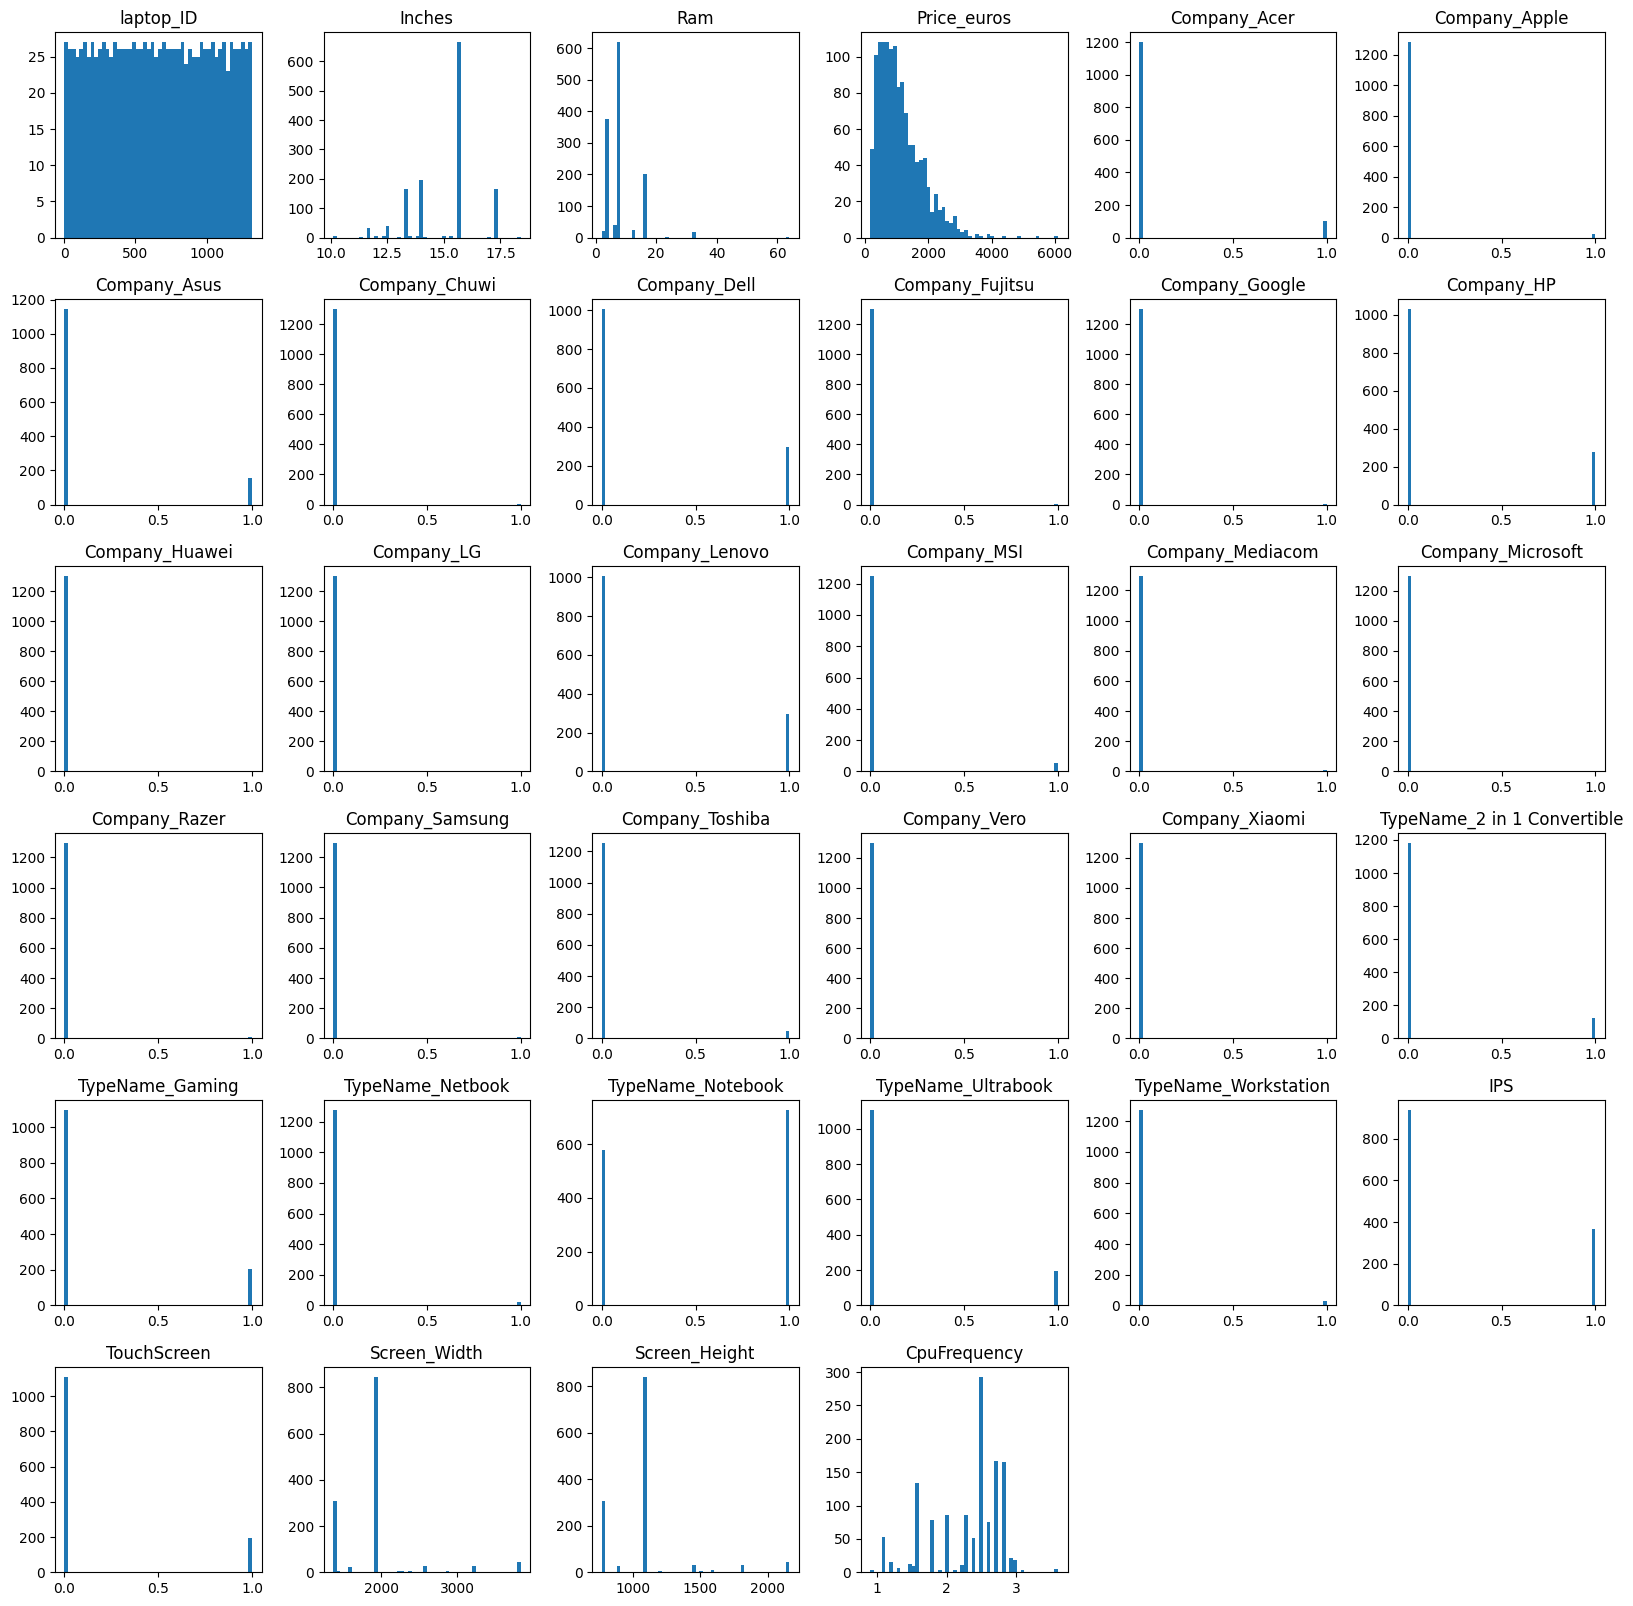

In [17]:
df.hist( figsize=(20, 20), bins=50, grid=False)

In [18]:
# Memory
df["Memory_Amt"] = df.Memory.str.split(" ").apply(lambda x: x[0])
df["Memory_Type"] = df.Memory.str.split(" ").apply(lambda x: x[-1])

def turn_memory_into_mb(value):
    if "GB" in value:
        return float(value.replace("GB", "")) * 1024
    elif "TB" in value:
        return float(value.replace("TB", "")) * 1024 * 1024
    elif "MB" in value:
        return float(value.replace("MB", ""))
    
df["Memory_Amt"] = df["Memory_Amt"].apply(turn_memory_into_mb)
df = df.drop(columns=["Memory"], axis=1)

In [19]:
# Weight
df["Weight"] = df.Weight.str.replace("kg", "").astype(float)

# GPU
df["GpuBrand"] = df.Gpu.apply(lambda x: x.split(" ")[0])
df.drop(columns=["Gpu"], axis=1, inplace=True)

In [20]:
# OpSys
df = df.join(pd.get_dummies(df.OpSys).astype(int))
df = df.drop(columns=["OpSys"], axis=1)

In [21]:
gpu_categories = pd.get_dummies(df.GpuBrand).astype(int)
gpu_categories.columns = [col + "_GPU" for col in gpu_categories.columns]
df = df.join(gpu_categories)

# Dropping the original 'GpuBrand' column
df = df.drop(columns=["GpuBrand"], axis=1)

In [22]:
# CPU Brand
cpu_categories = pd.get_dummies(df.CpuBrand).astype(int)
cpu_categories.columns = [col + "_CPU" for col in cpu_categories.columns]
df = df.join(cpu_categories)
df = df.drop(columns=["CpuBrand"], axis=1)

In [23]:
# Memory Type
memory_type_categories = pd.get_dummies(df.Memory_Type).astype(int)
memory_type_categories.columns = [col + "_Memory" for col in memory_type_categories.columns]
df = df.join(memory_type_categories)
df = df.drop(columns=["Memory_Type"], axis=1)

In [24]:
df.corr()

,laptop_ID,Inches,Ram,Weight,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,...,ARM_GPU,Intel_GPU,Nvidia_GPU,AMD_CPU,Intel_CPU,Samsung_CPU,HDD_Memory,Hybrid_Memory,SSD_Memory,Storage_Memory
laptop_ID,1.000000,-0.087796,-0.028607,-0.011798,0.067830,-0.057721,-0.119585,-0.044252,-0.043348,-0.013628,...,0.039920,0.094479,-0.037596,-0.055338,0.049765,0.039920,0.036596,0.108869,-0.071400,0.030768
Inches,-0.087796,1.000000,0.237993,0.827631,0.068197,0.009435,-0.158850,0.112766,-0.017426,0.045288,...,-0.052816,-0.592264,0.486561,0.129801,-0.122000,-0.052816,0.539655,0.049553,-0.373530,-0.371590
Ram,-0.028607,0.237993,1.000000,0.383874,0.743007,-0.138432,0.023950,0.088634,-0.035117,0.082241,...,-0.023894,-0.319551,0.415464,-0.104759,0.107051,-0.023894,-0.009773,0.033849,0.092726,-0.193294
Weight,-0.011798,0.827631,0.383874,1.000000,0.210370,0.056444,-0.138191,0.101332,-0.022536,0.088465,...,-0.037026,-0.596378,0.565232,0.062641,-0.057386,-0.037026,0.521872,0.090162,-0.414390,-0.261930
Price_euros,0.067830,0.068197,0.743007,0.210370,1.000000,-0.208349,0.080688,-0.010376,-0.055646,0.048509,...,-0.018431,-0.184205,0.348797,-0.180111,0.181127,-0.018431,-0.169901,0.007051,0.267559,-0.216282
Company_Acer,-0.057721,0.009435,-0.138432,0.056444,-0.208349,1.000000,-0.037497,-0.108831,-0.014074,-0.159187,...,-0.008119,0.005305,0.020848,0.068130,-0.066566,-0.008119,0.042773,-0.028246,-0.077776,0.087877
Company_Apple,-0.119585,-0.158850,0.023950,-0.138191,0.080688,-0.037497,1.000000,-0.047544,-0.006148,-0.069542,...,-0.003547,0.078028,-0.085183,-0.028607,0.028849,-0.003547,-0.113923,-0.012339,0.008158,0.231924
Company_Asus,-0.044252,0.112766,0.088634,0.101332,-0.010376,-0.108831,-0.047544,1.000000,-0.017845,-0.201839,...,-0.010295,-0.106654,0.170742,0.038455,-0.036835,-0.010295,0.128554,-0.035814,-0.144501,0.051064
Company_Chuwi,-0.043348,-0.017426,-0.035117,-0.022536,-0.055646,-0.014074,-0.006148,-0.017845,1.000000,-0.026102,...,-0.001331,0.043093,-0.031972,-0.010737,0.010828,-0.001331,-0.042760,-0.004631,-0.047270,0.195771
Company_Dell,-0.013628,0.045288,0.082241,0.088465,0.048509,-0.159187,-0.069542,-0.201839,-0.026102,1.000000,...,-0.015058,-0.075707,-0.060187,-0.121448,0.122473,-0.015058,0.061552,-0.014081,-0.000390,-0.125423


<Axes: >

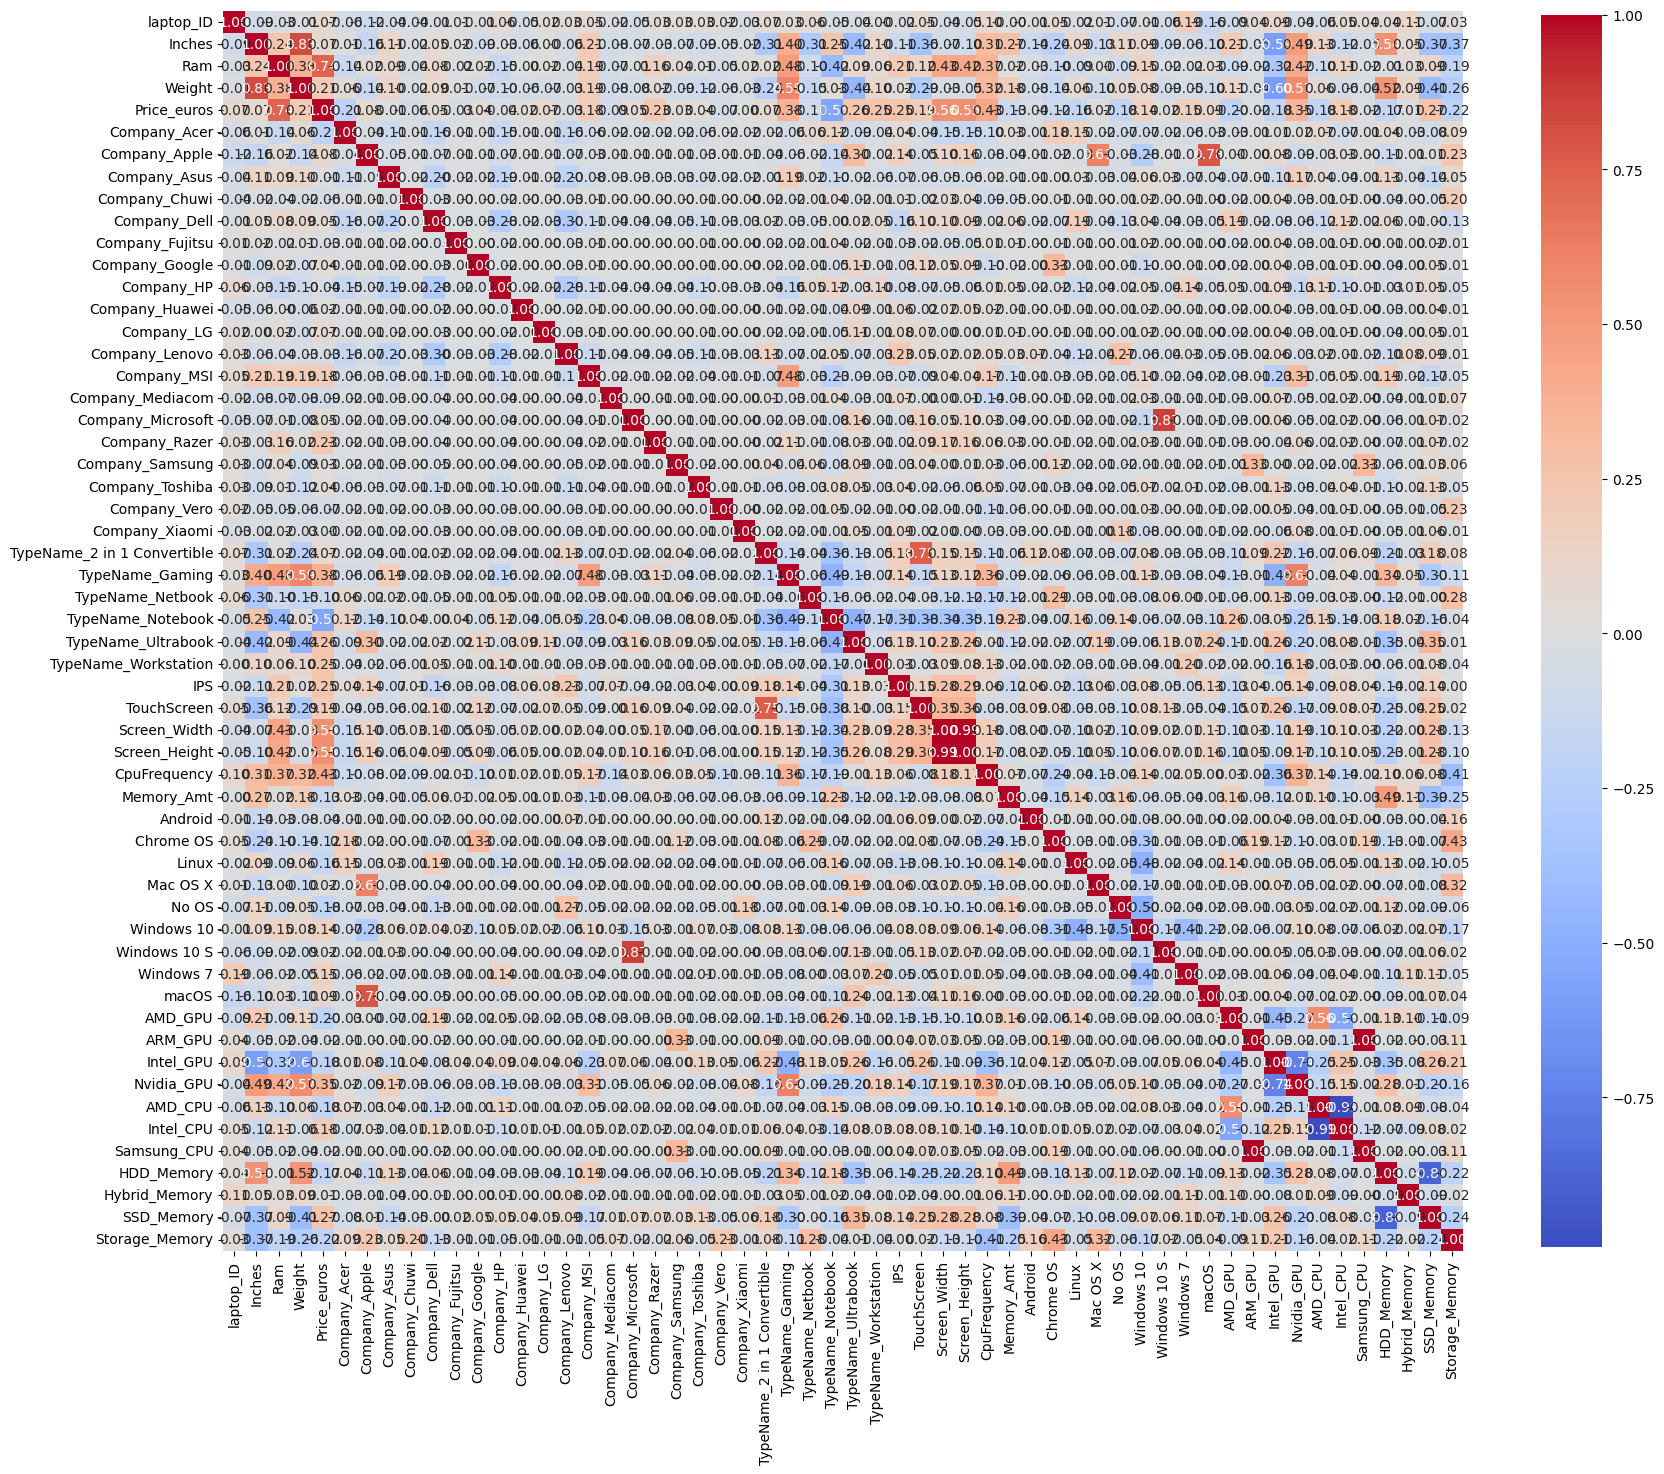

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})


In [26]:
target_correlation = df.corr()["Price_euros"].apply(abs).sort_values(ascending=False)
target_correlation

Price_euros                    1.000000
Ram                            0.743007
Screen_Width                   0.556529
Screen_Height                  0.552809
TypeName_Notebook              0.549248
CpuFrequency                   0.430293
TypeName_Gaming                0.375789
Nvidia_GPU                     0.348797
SSD_Memory                     0.267559
TypeName_Ultrabook             0.255658
IPS                            0.252208
TypeName_Workstation           0.249752
Company_Razer                  0.233756
Storage_Memory                 0.216282
Weight                         0.210370
Company_Acer                   0.208349
AMD_GPU                        0.199415
TouchScreen                    0.191226
Intel_GPU                      0.184205
Intel_CPU                      0.181127
AMD_CPU                        0.180111
Company_MSI                    0.180100
No OS                          0.177094
HDD_Memory                     0.169901
Linux                          0.162060


<Axes: >

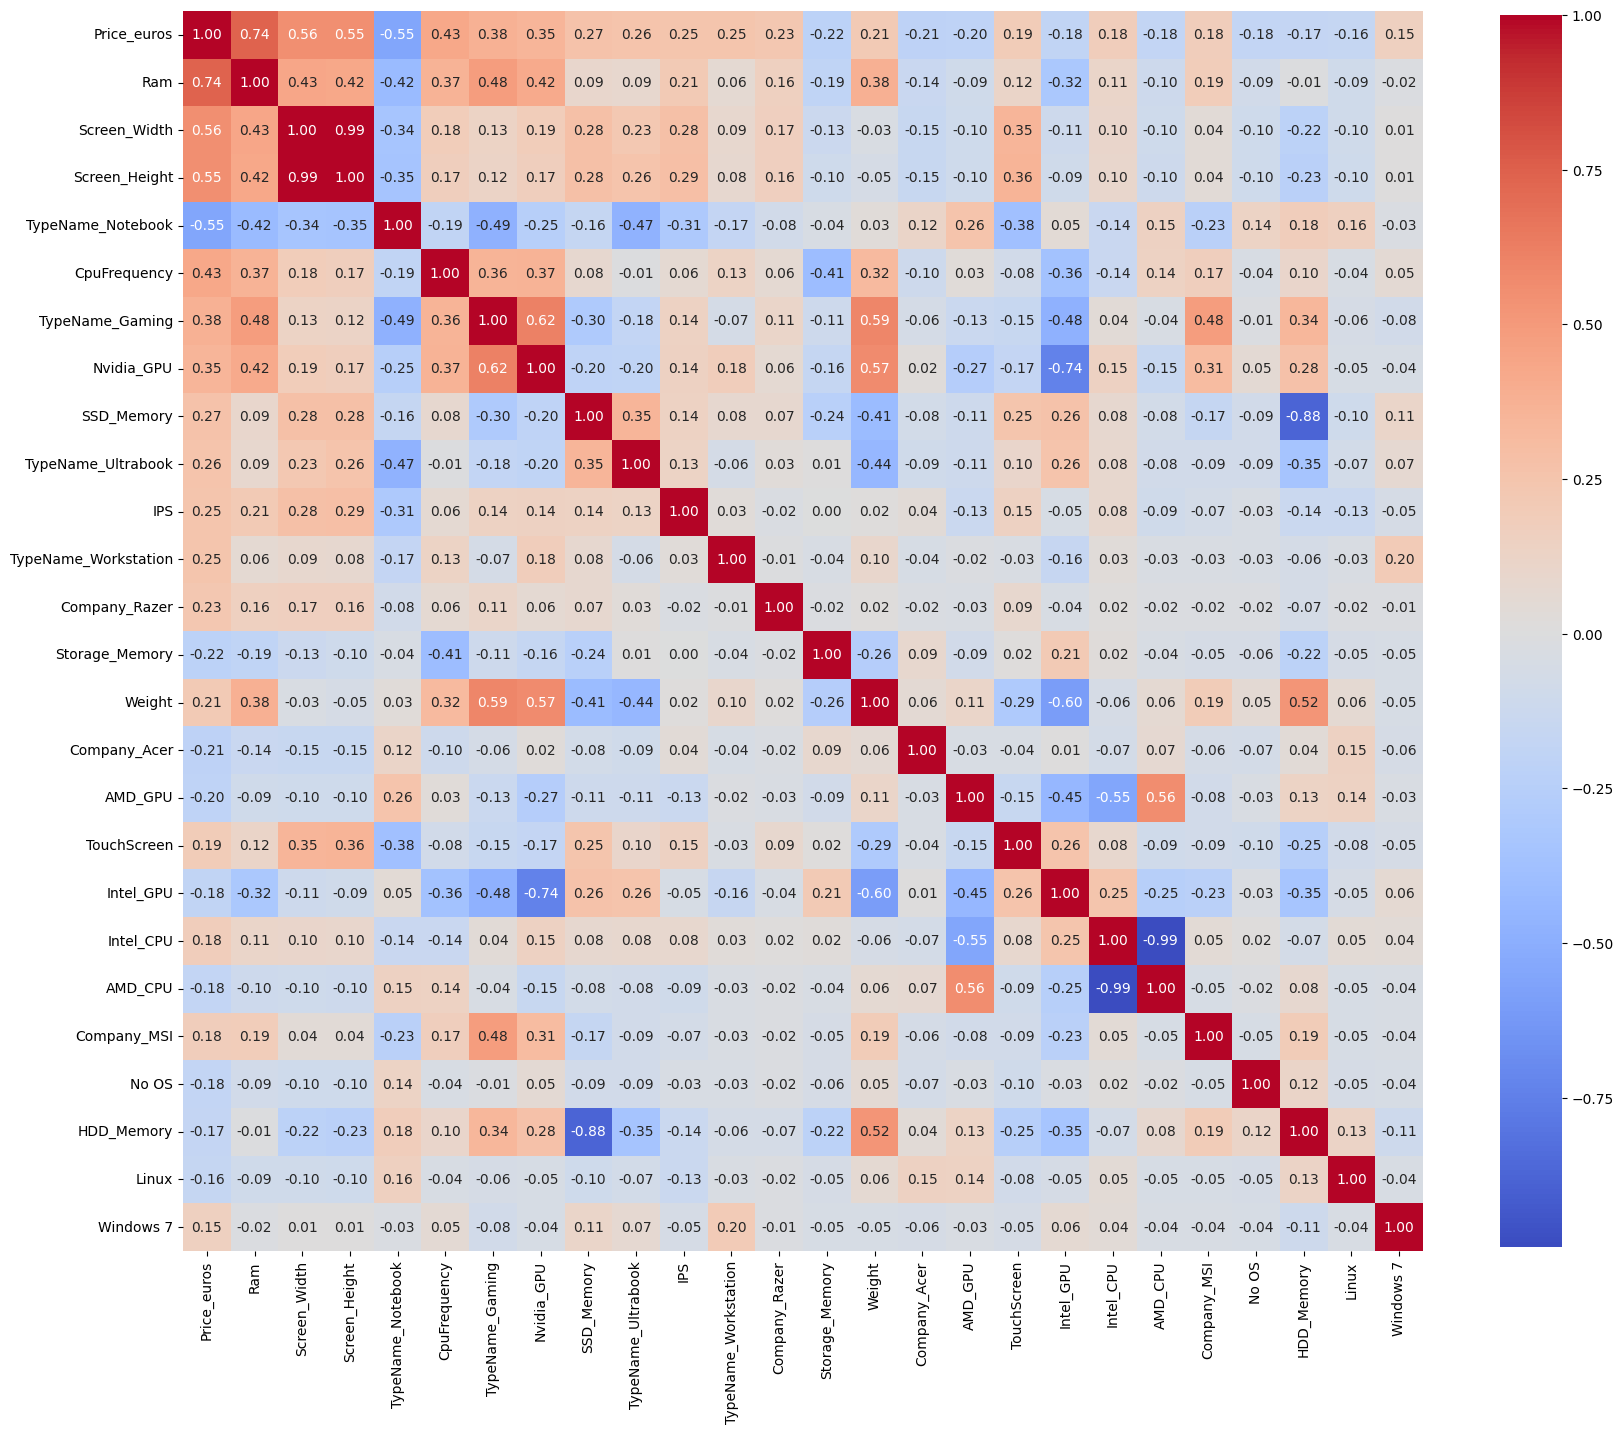

In [ ]:
selected_features = target_correlation[target_correlation > 0.15].index.tolist()

limited_df = df[selected_features]

plt.figure(figsize=(20, 20))
sns.heatmap(limited_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = limited_df.drop(columns=["Price_euros"]), limited_df["Price_euros"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train_scaled, y_train)
predictions = forest.predict(X_test_scaled)

forest.score(X_test_scaled, y_test)

0.8114519006506429

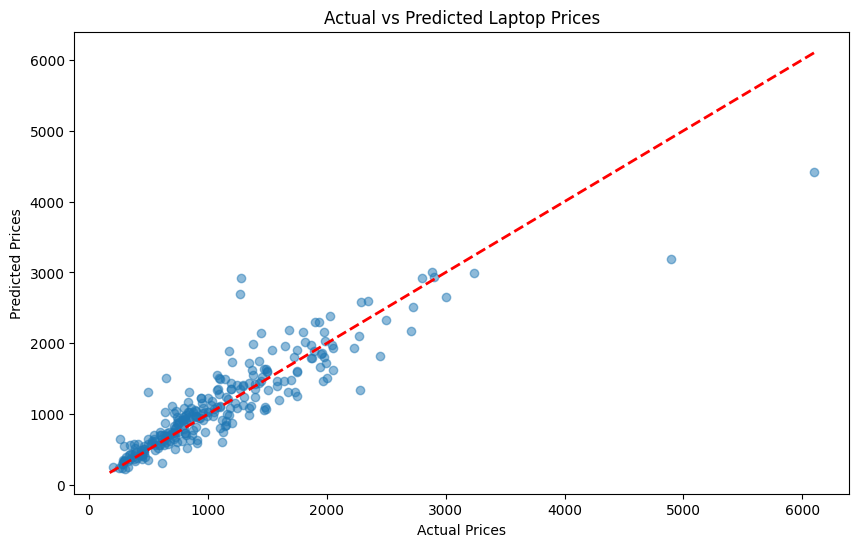

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Laptop Prices")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
# plt.xlim(y.min(), y.max())
# plt.ylim(y.min(), y.max())
plt.show()